## 作业任务
1. 对原始数据进行探索和可视化
2. 数据清洗和特征工程
3. 建立一个回归模型
4. 模型评估
5. 提交

备注：测试数据的标签未提供

最终成绩：模型在测试数据上的R2分数。

In [323]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [324]:
train=pd.read_csv('data/houseprice_train.csv')
hack_data = pd.read_csv('data/housing_hack.csv')
test=pd.read_csv('data/houseprice_test.csv')

In [325]:
train.shape,test.shape

((16512, 9), (4128, 8))


### 该数据集来自1990年美国人口普查

#### 标签
- target 加利福尼亚地区的房屋价值中位数

#### 特征
- Medlnc  住户收入中位数
- HouseAge  房屋使用年代中位数
- AveRooms  平均房间数目
- Ave Bedrms  平均卧室数目
- Population  街区人口
- Ave Occup  平均入住率 
- Latitude  街区的纬度
- Longitude  街区的经度

训练数据16512行

测试数据4128行

In [326]:
cols = train.shape[1]
X_train = train.iloc[:, 0:cols - 1]
y_train = train.iloc[:, cols - 1:cols]
X_test = test

In [327]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.9076,24.0,4.220497,1.116460,3018.0,4.686335,34.24,-118.53
1,4.2019,25.0,3.625442,1.017668,1646.0,5.816254,33.85,-117.93
2,2.6296,25.0,3.903226,1.095662,2359.0,2.624027,32.65,-117.09
3,1.6731,41.0,4.036827,1.053824,1803.0,5.107649,33.99,-118.24
4,3.6875,42.0,5.637255,1.053922,708.0,3.470588,33.89,-118.09
...,...,...,...,...,...,...,...,...
16507,4.0647,23.0,4.717113,1.111758,1950.0,2.270081,33.43,-117.62
16508,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28
16509,4.6350,36.0,6.693762,1.077505,1478.0,2.793951,37.71,-122.06
16510,3.1587,11.0,3.656874,1.045828,1700.0,1.997650,34.18,-118.31


## 数据清洗和可视化
这部分由同学们完成

建议：
- 清洗冗余特征
- 数据规范化
- 构造特征

In [328]:
import seaborn as sns
def paincorr(X_train,y_train):
    housing = pd.concat([X_train,y_train],axis=1)
    mask = np.zeros_like(housing.corr(), dtype=np.bool)
    #mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize = (15,12))
    sns.heatmap(housing.corr(), 
                annot=True,
                #mask = mask,
                cmap = 'RdBu_r',
                linewidths=0.1, 
                linecolor='white',
                vmax = .9,
                square=True)
    plt.title("Correlations Among Features", y = 1.03,fontsize = 17)
    plt.show()

C:\Users\wlz\AppData\Local\Temp/ipykernel_8544/2560604158.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(housing.corr(), dtype=np.bool)


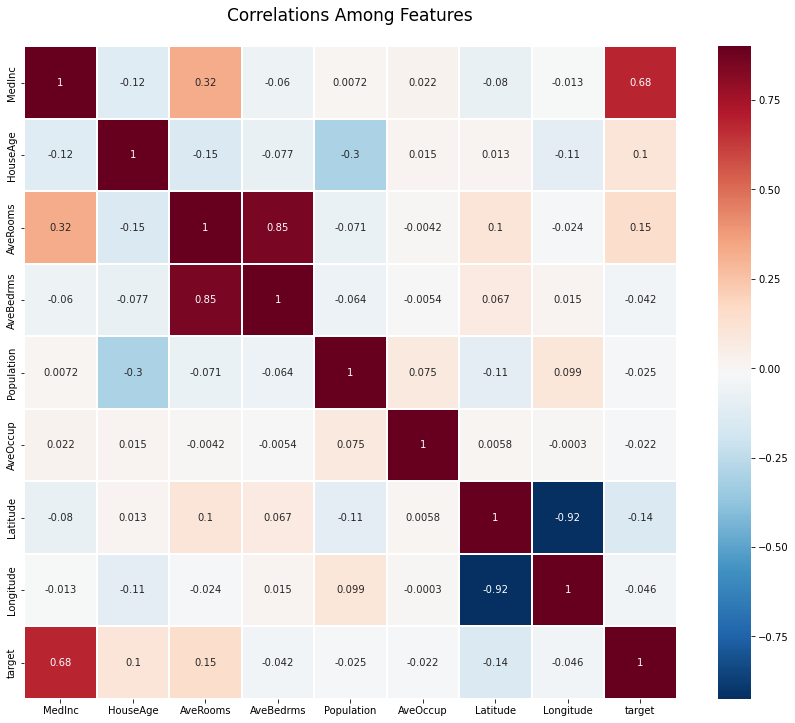

In [329]:
paincorr(X_train,y_train)

In [330]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.9076,24.0,4.220497,1.116460,3018.0,4.686335,34.24,-118.53
1,4.2019,25.0,3.625442,1.017668,1646.0,5.816254,33.85,-117.93
2,2.6296,25.0,3.903226,1.095662,2359.0,2.624027,32.65,-117.09
3,1.6731,41.0,4.036827,1.053824,1803.0,5.107649,33.99,-118.24
4,3.6875,42.0,5.637255,1.053922,708.0,3.470588,33.89,-118.09
...,...,...,...,...,...,...,...,...
16507,4.0647,23.0,4.717113,1.111758,1950.0,2.270081,33.43,-117.62
16508,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28
16509,4.6350,36.0,6.693762,1.077505,1478.0,2.793951,37.71,-122.06
16510,3.1587,11.0,3.656874,1.045828,1700.0,1.997650,34.18,-118.31


In [331]:
from sklearn.model_selection import train_test_split

In [332]:
citys = pd.read_csv("./data/citys.csv")
citys_lat = list(citys["lat"])[::-1]
citys_lng = list(citys["lng"])[::-1]
citys.head(3)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,NaN,12750807,1840020491
1,San Francisco,San Francisco,37.7562,-122.4430,United States,US,USA,California,NaN,3592294,1840021543
2,San Diego,San Diego,32.8312,-117.1225,United States,US,USA,California,NaN,3220118,1840021990


In [333]:

from math import radians, cos, sin, asin, sqrt

def geodistance(lng1,lat1,lng2,lat2):
    #lng1,lat1,lng2,lat2 = (120.12802999999997,30.28708,115.86572000000001,28.7427)
    lng1, lat1, lng2, lat2 = map(radians, [float(lng1), float(lat1), float(lng2), float(lat2)]) # 经纬度转换成弧度
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance=2*asin(sqrt(a))*6371*1000 # 地球平均半径，6371km
    distance=round(distance/1000,3)
    return distance

In [334]:
def getCityDistanceAndRank(lat,lng):
    d = [geodistance(lng,lat,i,j) for i,j in zip(citys_lng,citys_lat)]
    return min(d),d.index(min(d))

In [335]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [336]:
def trans(df):
    #df["new_coor_add"]= (df["Longitude"]+df["Latitude"])
    df["new_coor_sub"]= (df["Longitude"]-df["Latitude"])
    df["new_bedrate"]= (df["AveBedrms"]/df["AveRooms"])
    df["clearest_city_population"] = [getCityDistanceAndRank(i,j)[1] for i,j in zip(list(df["Latitude"]),list(df["Longitude"]))]
    df["clearest_city_distance"] = [getCityDistanceAndRank(i,j)[0] for i,j in zip(list(df["Latitude"]),list(df["Longitude"]))]
    df["per_popu_rooms"] = (df["AveRooms"]/df["Population"])
    #df.drop(["AveBedrms","AveRooms"],axis=1,inplace=True)
    #df = df.loc[:,["MedInc","HouseAge","AveBedrms","clearest_city_population","per_popu_rooms"]]
    return df


def trans_(df,scaler,istest,pca,pca_=False):
    if not istest:
        df = scaler.fit_transform(df)
        if pca_:
            df = pca.fit_transform(df)
    else:
        df = scaler.transform(df)
        if pca_:
            df = pca.transform(df)
    return df

In [337]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,6.6320,27.0,5.879218,1.062167,1402.0,2.490231,33.65,-117.90
1,2.2227,30.0,5.278552,1.019499,990.0,2.757660,40.77,-124.17
2,6.0426,19.0,4.839506,1.345679,287.0,3.543210,37.97,-122.34
3,1.9762,52.0,4.242754,1.152174,1126.0,4.079710,34.06,-117.75
4,3.1635,30.0,3.505068,1.160473,1026.0,1.733108,34.02,-118.49


C:\Users\wlz\AppData\Local\Temp/ipykernel_8544/2560604158.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(housing.corr(), dtype=np.bool)


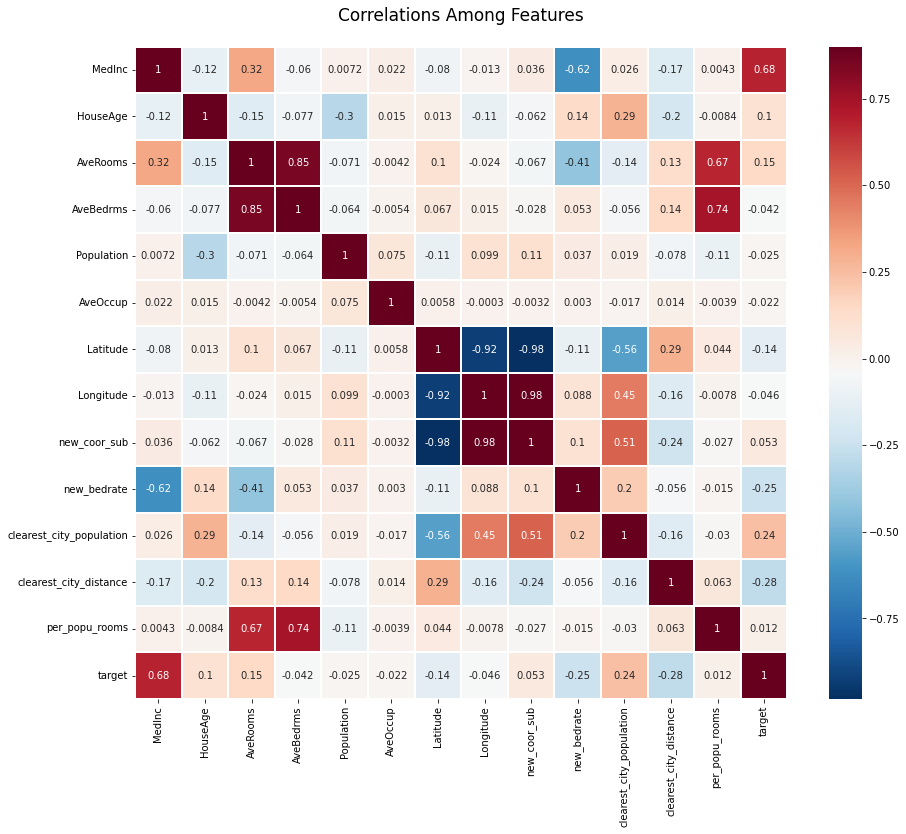

In [338]:
scaler = StandardScaler(with_mean=True,with_std=True)
pca = PCA(n_components=0.98)
X_test.columns =list( X_train.columns)
X_train = trans(X_train)

X_test = trans(X_test)
paincorr(X_train,y_train)
X_train = trans_(X_train,scaler,False,pca)
X_test = trans_(X_test,scaler,True,pca)

In [339]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

# 特征工程

经度+维度 同时考虑两个特征

卧室占比 卧室数量除以房间数量



# 预处理
标准化

## 构建模型和测评
这部分由同学们完成

baseline是没有做特征工程的数据建模，使用线性回归得到的模型。

建议：
- 不一定使用这个模型，可以使用任何回归模型
- 建议调参

In [340]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
#y_test=pd.read_csv('data/y_test.csv')['target']

In [341]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_score_linear_train = r2_score(y_train, y_pred_train)

## 因为只有训练集有标签，只能生成训练集的分数
print('R2_score (train): ',r2_score_linear_train)

R2_score (train):  0.6226675473632926


In [342]:
r2_score_test = r2_score(y_pred_test,y_test)
print(r2_score_test)

0.3725345523776614


In [343]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_score_linear_train = r2_score(y_train, y_pred_train)

## 因为只有训练集有标签，只能生成训练集的分数
print('R2_score (train): ',r2_score_linear_train)

R2_score (train):  1.0


In [344]:
r2_score_test = r2_score(y_pred_test,y_test)
print(r2_score_test)

0.6517705969579606


In [345]:
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)
# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)
# r2_score_linear_train = r2_score(y_train, y_pred_train)

# ## 因为只有训练集有标签，只能生成训练集的分数
# print('R2_score (train): ',r2_score_linear_train)

In [357]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
model=XGBRegressor(learning_rate=0.1, n_estimators=475, max_depth=5, min_child_weight=5, seed=0,
                             subsample=0.7, colsample_bytree=0.7, gamma=0.1, reg_alpha=1, reg_lambda=1)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_train)
print('R2_score (train): ',r2_score_linear_train)
y_pred_test = model.predict(X_test)
r2_score_test = r2_score(y_pred_test,y_test)
print(r2_score_test)

R2_score (train):  0.9433166162876293
0.8164349437462575


In [347]:
from sklearn.model_selection import GridSearchCV

In [348]:
model= LinearRegression()
parameters = {"fit_intercept":(True,False),
        "normalize":(True,False),
}

In [349]:
# model= DecisionTreeRegressor()
# parameters = {'splitter':('best','random')
#               ,'criterion':("friedman_mse","entropy","absolute_error")
#               ,"max_depth":[*range(1,10)]
#               ,'min_samples_leaf':[*range(1,50,5)]
# }


In [350]:

clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)})

In [351]:
clf.best_estimator_

LinearRegression(normalize=True)

In [352]:
clf.best_score_

0.617696771064743

In [353]:
y_pred_test = clf.predict(X_test)


In [354]:
r2_score_test = r2_score(y_pred_test,y_test)
print(r2_score_test)

0.372453342224082


### 务必把StudentId写成自己的学号，否则没有成绩！

In [355]:
student_id = '20211320130'#写自己的学号
subdir="./"

In [356]:
submission = pd.DataFrame(y_pred_test, columns=['target'])

submission.to_csv(subdir + student_id + 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y%m%d_%H%M%S')),
                  index=False)

## 这里就提交了，这里的代码不能改

### 最后下载csv和代码文件的pdf版本（或者html版本）文件上传到ftp://10.132.219.5:955 的相应目录

先上传csv文件，测评结束后再上传代码文件！！